In [122]:
# import our needed libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 
from numba import jit
import time 
from sklearn.datasets import load_iris
from tqdm.notebook import tqdm
plt.rcParams['figure.figsize'] = (20, 10)


# Define our needed functions -------------------------------
# function for reading an image from its path
def reading_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# showing an image by matplotlib library
def showing_image(image): 
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.show()
    
# this function is for Gaussian Mean Shift
def guassian_mean_shift(data, sigma=0.2, num_iter=1000, epsilon=4, normalized_parameter=1, print_report=False):
    
    # data normalization
    data_in = data.astype(np.float32).copy() / normalized_parameter    
    # creating output 
    z = np.zeros(data.shape)
    
    # number of data points
    n_data = data.shape[0]
    
    # loop over all data points
    for n in tqdm(range(n_data)):
        x = data_in[n, :].copy()
        
        # loop over one point
        for iteration in range(num_iter):
            
            # the algorithm body : 
            exp_term = np.exp(-0.5 * (((x - data_in) / sigma) ** 2).sum(axis=1))
#             print(f'expt term: {(((x - data_in) / sigma) ** 2).sum(axis=1)}')
            p = exp_term / exp_term.sum()
            p = p.reshape(-1, 1)
            current_x = x.copy()
            x = (data_in * p).sum(axis=0)
            
#             print('x : ', x)
#             print('p : ', p)
#             print('current x : ', current_x)
#             print('---------')
            
            # reduce time complexity
            if np.sum((x - current_x) ** 2) < epsilon:
                break
            
        # save the result
        z[n, :] = x 
        
        # print report to user
        if print_report:
            print('n : ', n)
            print('iter : ', iteration)

    return z

# pick some centers that are not close together
def choose_centers(data, epsilon=0.1):
    
    # size of data
    n_data = data.shape[0]
    
    # creating output array
    centers = []
    
    # main loop 
    for n in tqdm(range(n_data)):
        
        # check to be alone in its neighborhood
        is_alone = True
        for center in centers:
            if np.sum((data[n, :] - center) ** 2) < epsilon:
                is_alone = False
                break
                
        # pick the center if it has no similar one. 
        if is_alone:
            centers.append(data[n, :])
        
    centers = np.array(centers)
    return centers


# assing pixels to the centers
def assign_pixels(data, centers):
    
    # creating output
    result = np.zeros(data.shape)
    # size of data
    n_data = data.shape[0]
    
    # loop over all datas
    for n in tqdm(range(n_data)):
        x = data[n, :].copy()
        
        # find closest center
        indx = np.argmin(np.sum((x - centers) ** 2, axis=1))
        result[n, :] = centers[indx]
        
    return result

# function for plotting scatter
def plot_scatter(data):
    plt.figure()
    plt.scatter(data[:, 0], data[:, 1])
    plt.show()

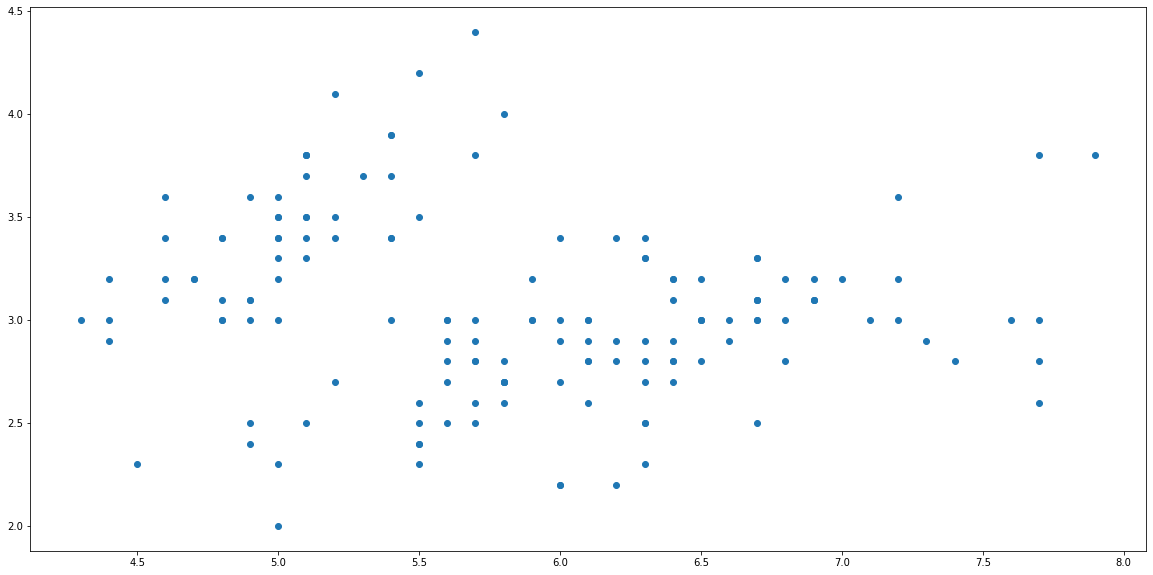

  0%|          | 0/150 [00:00<?, ?it/s]

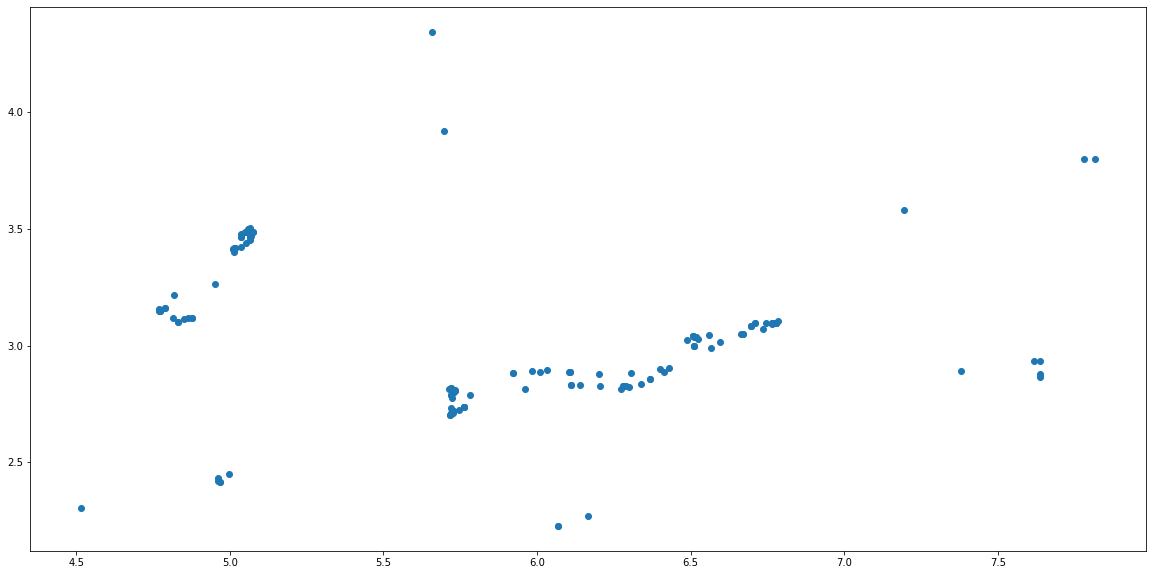

data output shape :  (150, 2)


  0%|          | 0/150 [00:00<?, ?it/s]

centers.shape :  (14, 2)
centers : 
 [[5.07460833 3.48441863]
 [4.85177708 3.11534238]
 [5.69704962 3.91914177]
 [5.65724277 4.3420434 ]
 [4.51548624 2.30451059]
 [6.76668787 3.09557462]
 [5.71713257 2.70444202]
 [6.43095112 2.90420151]
 [4.96022272 2.42170191]
 [6.06767893 2.22722149]
 [6.10534954 2.88484955]
 [7.6177969  2.93424869]
 [7.19611502 3.58172631]
 [7.78123951 3.79994726]]


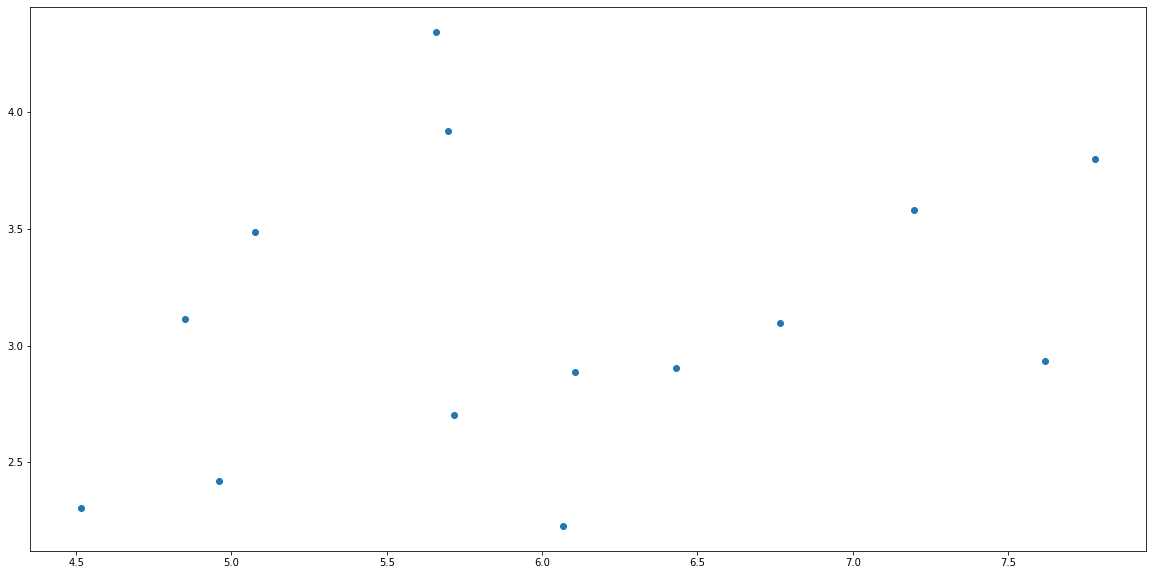

  0%|          | 0/150 [00:00<?, ?it/s]

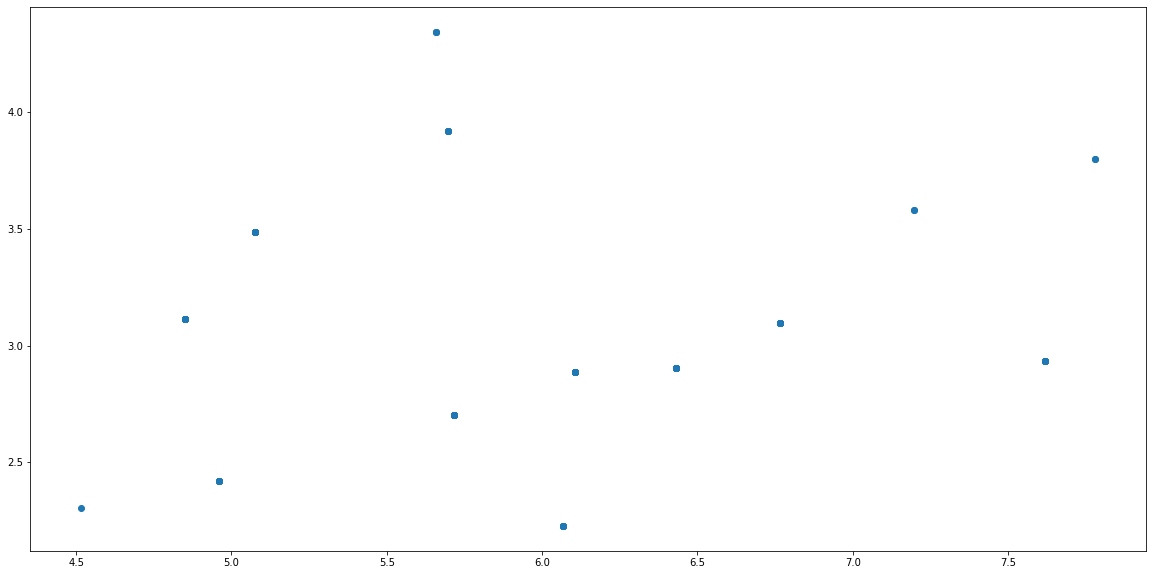

output shape :  (150, 2)


In [130]:
# creating a dataset
data = load_iris().data[:, :2]
plot_scatter(data)

# run the main algorithm 
data_output = guassian_mean_shift(data, sigma=0.15, num_iter=500, epsilon=0.001, print_report=False)
plot_scatter(data_output)
print('data output shape : ', data_output.shape)

# pick some centers between many 
centers = choose_centers(data_output)
print('centers.shape : ', centers.shape)
print('centers : \n', centers)
plot_scatter(centers)

# assign input pixels to nearest center
output = assign_pixels(data, centers)
plot_scatter(output)
# print('output : ', output)
print('output shape : ', output.shape)

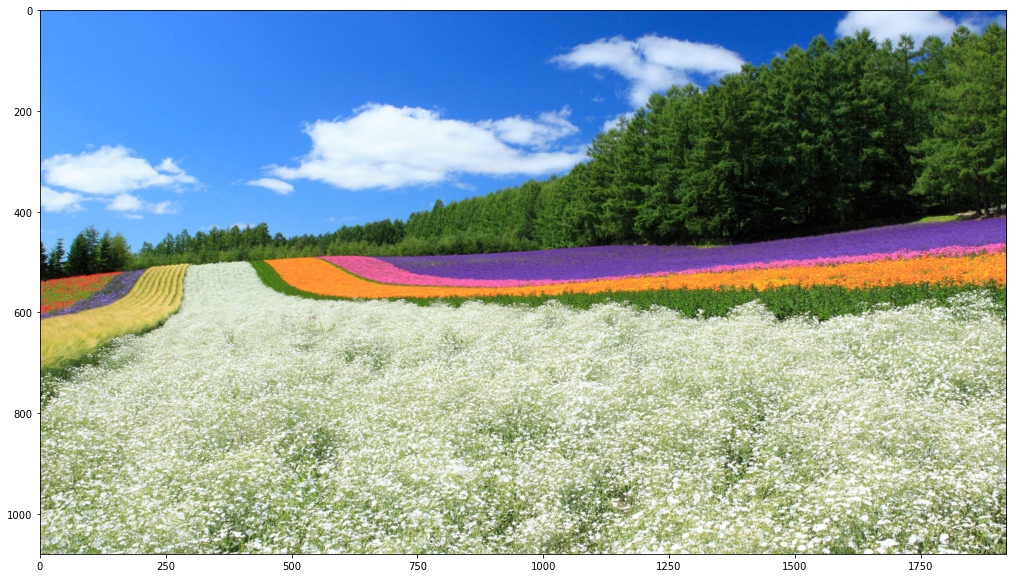

In [131]:
# Reading our images
img_org = reading_image('Furano.jpg')

# Showing the images
showing_image(img_org)

data shape befor downsampling :  (270, 480, 3)
data shape after cropping :  (250, 460, 3)


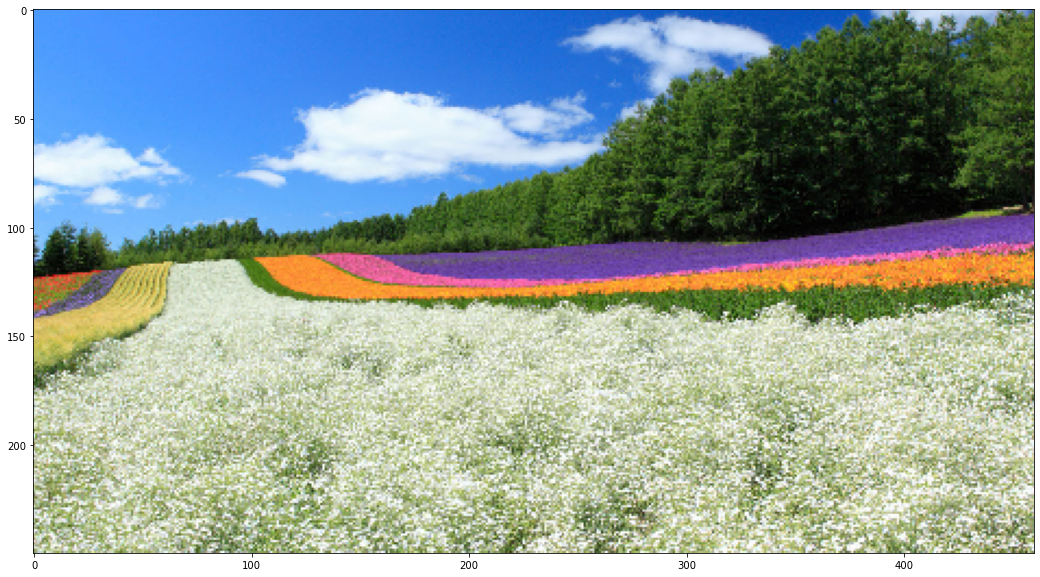

data shape after flattening :  (115000, 3)


In [225]:
# creating our data
data = img_org.copy()

# downsampling data size to reduce complexity time
k = 4
data = data[::k, ::k]
print('data shape befor downsampling : ', data.shape)

# crop our input data to reduce time complexity
x1 = 10
y1 = 10 
x2 = 260
y2 = 470
data = data[x1:x2, y1:y2]
print('data shape after cropping : ', data.shape)

# show image
showing_image(data)

# flattenning data to pass to the function
data = data.reshape(-1, 3)
print('data shape after flattening : ', data.shape)



  0%|          | 0/115000 [00:00<?, ?it/s]

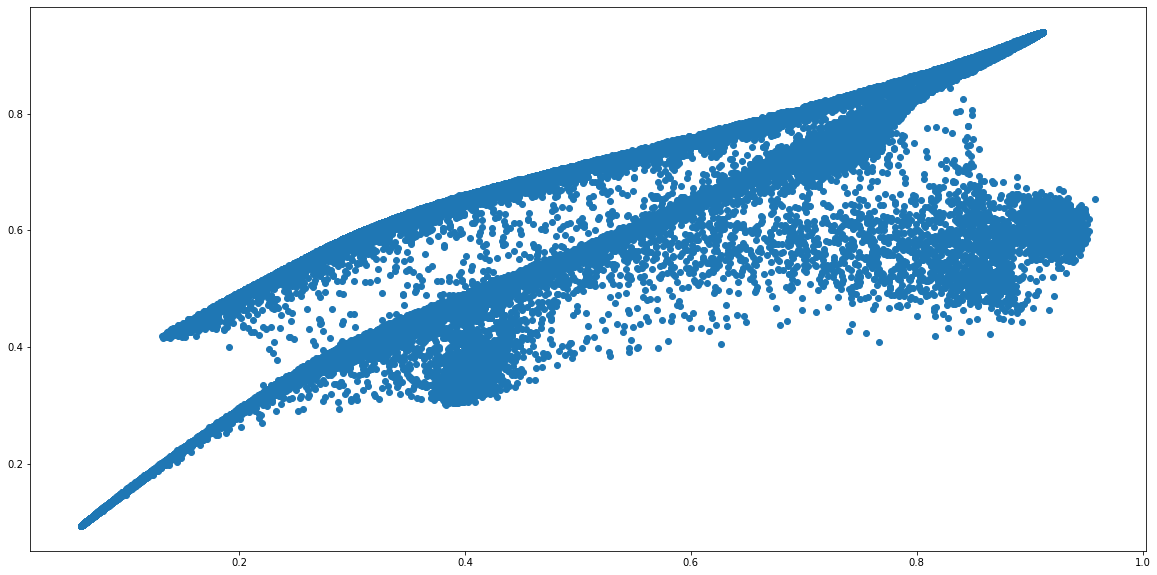

data output shape :  (115000, 3)


In [226]:
# run the main algorithm
data_output = guassian_mean_shift(
    data,
    sigma=0.15,
    num_iter=20,
    epsilon=0.1,
    normalized_parameter=255,
    print_report=False
)

# show the scatter plot of the output
plot_scatter(data_output)
print('data output shape : ', data_output.shape)

In [311]:
# pick some centers from many close together
centers = choose_centers(data_output, epsilon=0.3)
print('centers.shape : ', centers.shape)
print('centers : ', centers)

# convert to 255 format from normalized one
centers *= 255

  0%|          | 0/115000 [00:00<?, ?it/s]

centers.shape :  (4, 3)
centers :  [[0.30303606 0.59424263 0.96382922]
 [0.62161595 0.6645664  0.49068516]
 [0.21833499 0.31034353 0.13995416]
 [0.88363618 0.92035872 0.90830177]]


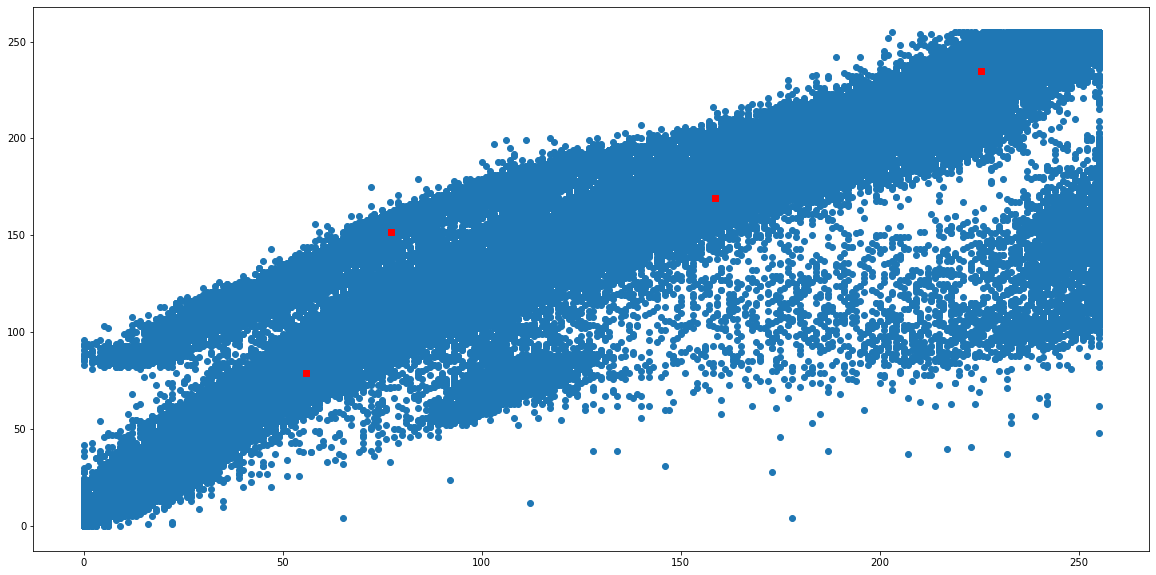

In [312]:
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='s', s=40)
# plot_scatter(centers)

In [313]:
output = assign_pixels(data, centers)

  0%|          | 0/115000 [00:00<?, ?it/s]

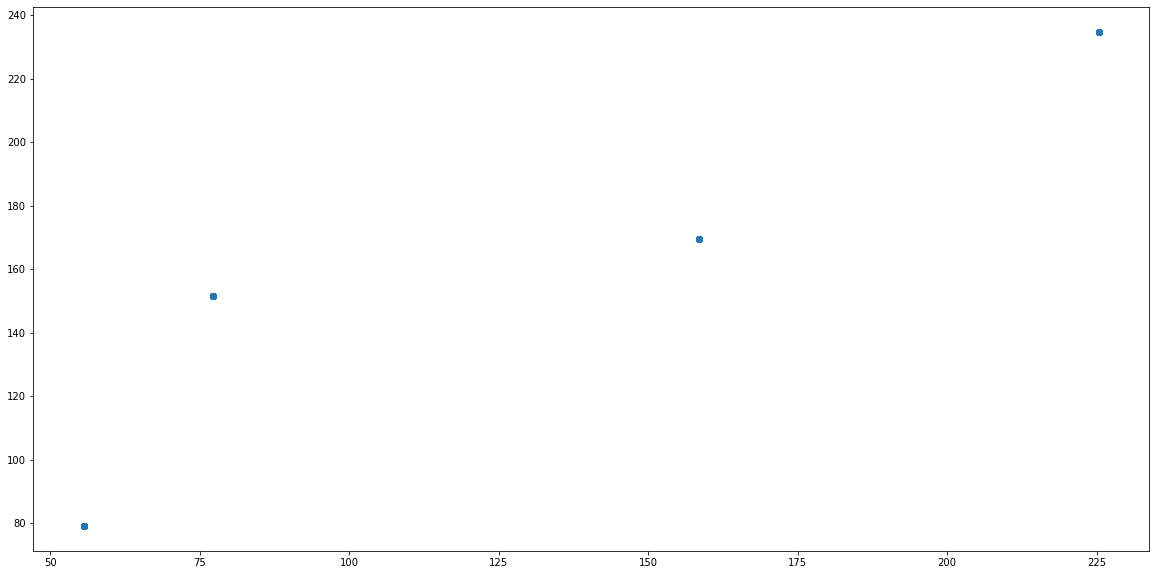

In [314]:
plot_scatter(output)

In [315]:
print(output)
print(output.shape)

[[ 77.2741963  151.53187126 245.77645093]
 [ 77.2741963  151.53187126 245.77645093]
 [ 77.2741963  151.53187126 245.77645093]
 ...
 [225.32722503 234.69147295 231.61695153]
 [158.5120663  169.46443141 125.12471706]
 [158.5120663  169.46443141 125.12471706]]
(115000, 3)


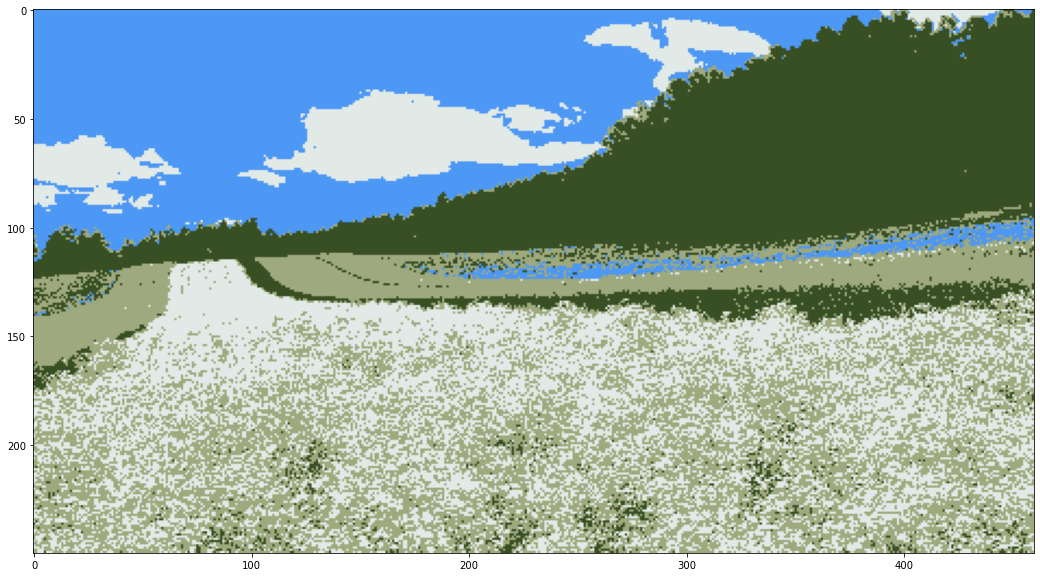

True

In [316]:
output = output.reshape(x2-x1, y2-y1, 3)
output = output.astype(np.uint8)
showing_image(output)

result01 = cv2.cvtColor(output, cv2.COLOR_RGB2BGR)
cv2.imwrite('result01.jpg', result01)